# Wordcloud

In [35]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /home/chloe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "sach", "heures", "toutes", "hier", "très"
       , "etc", "leurs", "grandes", "lés", "ille", "quo", "peu", "bon", "vers", "grand", "puis", "mois", "personne",
       "devant", "beau", "mén", "elles", "toujours", "déjà", "avenue", "quatre", "fort", "jours", "aujourd",
       "car", "hier", "toute", "grands", "app", "matin", "bne", "bas", "adresser", "haut", "dés",
       "place", "rue", "Bruxelles", "DCM", "ecr", "jour","maison", "ans", "chez", "réf", "prendre",
       "mod", "pers", "suite", "Mme", "voir", "cause", "louer", "porte", "belle", "fille",
       "adr", "quart", "maisons", "rué", "fit", "seule", "agence", "plusieurs", "bonnes", "ceux", "quelques",
       "faits", "jeune", "cent", "vient", "point", "portées", "avant", "serv", "com", "jard",
       "enfant", "désire", "cuis", "Bruxelles", "bruxelles", "grande", "petit", "bons", "dcm", "soir",
       "près", "bonne", "demande", "prix", "fois", "dés", "vendre", "jamais", "chaussée", "bonne", "franc", "lieu", "rien", "quartier",
       "pris", "fois", "tranq", "pos", "vente", "bonne", "neuve", "cuisine", "servante", "mat", "écrire",
       "juillet", "notaire", "dès", "quand", "temps", "pet", "celui", "donné", "partie", "homme", "petite", "cours",
       "mme","part", "coup", "demi", "pens", "neuf", "ruo", "cinq", "ici", "cond", "ferme", "coucher", "demandé",
       "ferm", "comm", "notaires", "août", "prop", "alors", "mardi", "beaucoup", "enfants", "ventes", "lundi", "jeudi",
       "donner", "nuit", "chamb", "chaque", "dimanche", "dos", "uno", "garn", "lés", "fam", "jolie", "demain", "année",
       "petite", "fam", "uno", "celui", "contenant", "premier", "assez", "nouvelles", "beaucoup", "cond", "con",
       "PET", "vendredi", "quand", "nouveau", "gros", "dix", "mieux", "journ", "chaque", "cert", "dém", "dos",
       "vend", "chamb", "alors", "seulement", "mars", "delà", "trop", "courant", "demain", "brux",
       "dernier", "hon", "bel", "seul", "frais", "petits", "dernière", "mis", "diverses", "référ",
       "jne", "tant", "franco", "francs","quelque", "nouvelle", "vieux", "placé", "garni",
       "mal", "sachant", "six", "nommé", "propre", "avril", "coud", "juin", "octobre", "enf",
       "mis", "divers", "sait", "servi", "flam", "septembre", "frais", "hom", "bel", "hon",
       "ouvrir", "enfin", "février", "hui", "dessus", "lès", "janvier", "scs", "partout", "façon",
       "laquelle", "ste", "samedi", "mans", "années", "ment", "mai", "voici", "céder", "surtout",
       "mercredi", "parmi", "franç", "font", "ancien", "cond", "mlle", "jeunes", "beaux", "semaine",
       "garnie", "reçu", "trouve", "derrière", "ruc", "rest", "conn", "lit", "haute", "parce", "fin",
       "aucune", "aussitôt", "ouvr", "aucune", "donne", "certains", "ord", "peuvent", "loin", "décembre",
       "autant", "possible", "première", "prochains", "faite", "voilà", "rendre", "maintenant", "ensuite",
       "los", "novembre", "presque", "ailleurs", "longtemps", "veut", "heure", "cependant", "écrit", "pourrait",
        "comment", "mettre", "abord", "oui", "mêmes", "nombreux", "également", "malgré" ]
sw = set(sw)

### Préparation du corpus

In [37]:
# Lister les fichiers de cette année
data_path = 'data'
txts = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f))]
len(txts)

1015

In [38]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(data_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [39]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

1015

In [40]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

'sjinoi aujourd\'hui matin par un terrible accl 4_it. Le nommé Vanderveeken, célibataire, demeurant avec sa mère au n" 18 de la dite rue, avait quitté son habitation de grand matin «t, selon son habitud'

In [41]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'*.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [42]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'*.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

'sjinoi aujourd\'hui matin par un terrible accl 4_it. Le nommé Vanderveeken, célibataire, demeurant avec sa mère au n" 18 de la dite rue, avait quitté son habitation de grand matin «t, selon son habitude, était rentré pris de boisson. Il monta _ l\'étage, mais ne trou- yjsjit personne â la maison. Il voulut pénétror j an[1 gg chambre en escaladant une plate- fornio située au troisième étage. Tout à coup, par suite d\'un faux mouvement, 11 perdit pied, fut lancé dans le vide et vint s\'abattre d\'une h'

#### Fonction de nettoyage

In [43]:
def clean_text(folder=None):
    if folder is None:
        input_path = f"*.txt"
        output_path = f"*_clean.txt"
    else:
        input_path = f"{folder}/*.txt"
        output_path = f"{folder}/*_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [44]:
clean_text(folder=temp_path)

'Output has been written in ../data/tmp/*_clean.txt!'

In [45]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'*_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'SJINOI TERRIBLE ACCL VANDERVEEKEN CÉLIBATAIRE DEMEURANT MÈRE DITE QUITTÉ HABITATION SELON HABITUDE RENTRÉ BOISSON MONTA ÉTAGE TROU YJSJIT VOULUT PÉNÉTROR CHAMBRE ESCALADANT PLATE FORNIO SITUÉE TROISIÈME ÉTAGE FAUX MOUVEMENT PERDIT PIED LANCÉ VIDE VINT ABATTRE HAUTEUR HUIT MÈTRES DALLES COUR BRUIT CHUTE LOCATAIRES AOCOTTRURENT IMMÉDIATEMENT TROUVÈRENT MALHEUREUX SOL DONNANT SLGNO VIE COUVERT SOINS EMPRESSÉS PRODIGUÉS NÉLA INUTILES ETR VICTIME RENDIT SOUPIR INSTANTS REPRIS CONNAISSANCE NAMUR CERCL'

In [46]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('CONGO', 16941), ('ETAT', 12698), ('GOUVERNEMENT', 9392), ('BELGIQUE', 8284), ('PAYS', 8134), ('TRAVAIL', 7850), ('SOCIÉTÉ', 7160), ('GÉNÉRAL', 6848), ('PARIS', 6780), ('ROI', 6696)]


In [47]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)



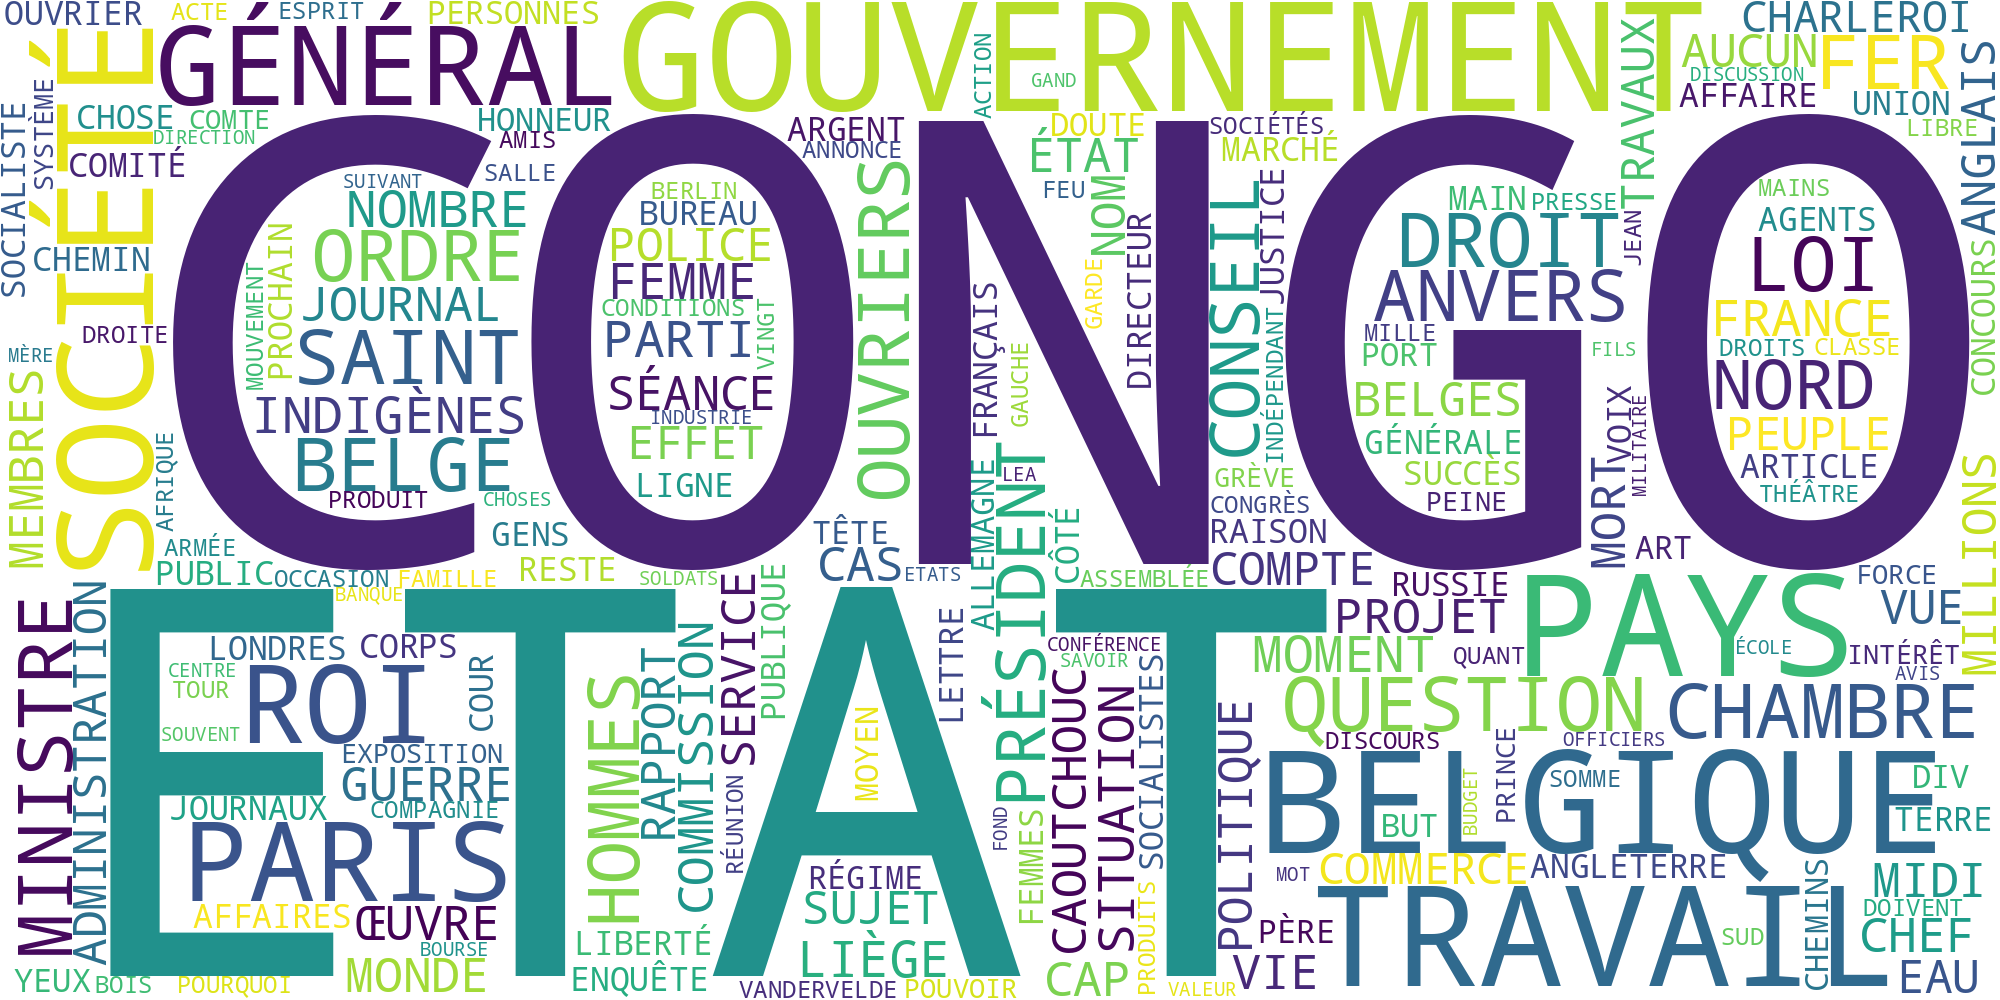

In [48]:
cloud.to_file(os.path.join(temp_path, f"*.png"))
Image(filename=os.path.join(temp_path, f"*.png"))